In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heartdisease_data.csv')
df

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [3]:
#updating the column names accordng to dataset.
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
df = pd.read_csv('heartdisease_data.csv',header=None,names=columns)
df

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [4]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [5]:
df.tail()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0
199,62,1,2,120,254,0,2,93,1,0,?,?,?,1


In [6]:
df.keys()

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
age        200 non-null int64
sex        200 non-null int64
cp         200 non-null int64
restbp     200 non-null object
chol       200 non-null object
fbs        200 non-null object
restecg    200 non-null int64
thalach    200 non-null object
exang      200 non-null object
oldpeak    200 non-null object
slope      200 non-null object
ca         200 non-null object
thal       200 non-null object
num        200 non-null int64
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [8]:
#check the null values without using visualization

df.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
num        0
dtype: int64

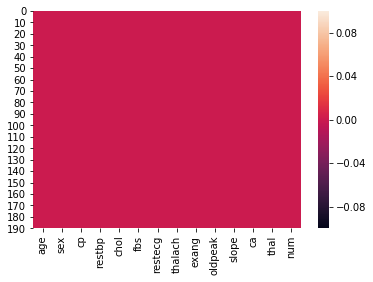

In [9]:
##Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())
plt.show()

In [10]:
df = pd.DataFrame(data=df)
df

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [11]:
df.shape

(200, 14)

In [12]:
#Replacing "?" with '0'
df.replace('?', 0,inplace=True)
df

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,0,0,2
1,44,1,4,130,209,0,1,127,0,0,0,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,0,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,0,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,0,0,0,1
196,62,1,1,0,139,0,1,0,0,0,0,0,0,0
197,55,1,4,122,223,1,1,100,0,0,0,0,6,2
198,58,1,4,0,385,1,2,0,0,0,0,0,0,0


In [13]:
df = df.apply(pd.to_numeric)

In [14]:
#fter applying the numeric. objects value are converted to integers and float.
df.apply(pd.to_numeric).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
age        200 non-null int64
sex        200 non-null int64
cp         200 non-null int64
restbp     200 non-null int64
chol       200 non-null int64
fbs        200 non-null int64
restecg    200 non-null int64
thalach    200 non-null int64
exang      200 non-null int64
oldpeak    200 non-null float64
slope      200 non-null int64
ca         200 non-null int64
thal       200 non-null int64
num        200 non-null int64
dtypes: float64(1), int64(13)
memory usage: 22.0 KB


In [15]:
df.dtypes

age          int64
sex          int64
cp           int64
restbp       int64
chol         int64
fbs          int64
restecg      int64
thalach      int64
exang        int64
oldpeak    float64
slope        int64
ca           int64
thal         int64
num          int64
dtype: object

In [16]:
#finding the unique values
df['restbp'].unique()

array([140, 130, 132, 142, 110, 120, 150, 180, 160, 126,   0, 128, 170,
       152, 116, 124, 122, 144, 154, 125, 104, 136, 134, 138, 178, 146,
       135, 158, 106, 112, 102,  96, 172, 155, 156, 118, 100, 190, 114,
       127], dtype=int64)

In [17]:
#finding the correlation (diagonal values are same)
dfcor=df.corr()
dfcor

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,0.034230,-0.038280,0.039836,0.049923,0.135728,0.002400,-0.056605,0.106330,0.134659,0.092595,NaN,-0.048196,0.287289
sex,0.034230,1.000000,0.038036,-0.038828,-0.101693,-0.059400,0.060621,-0.037544,-0.008804,0.058379,0.032002,NaN,-0.091739,0.147470
cp,-0.038280,0.038036,1.000000,0.226815,0.048981,-0.044416,0.034790,0.172127,0.277842,0.186268,0.213681,NaN,0.140282,0.168210
restbp,0.039836,-0.038828,0.226815,1.000000,0.003277,-0.010777,-0.002053,0.875749,0.577448,0.480473,0.487198,NaN,0.210492,0.085980
chol,0.049923,-0.101693,0.048981,0.003277,1.000000,0.156311,0.002391,-0.089120,0.034514,-0.060076,-0.059847,NaN,-0.068196,0.058451
fbs,0.135728,-0.059400,-0.044416,-0.010777,0.156311,1.000000,0.170616,-0.054900,-0.217705,-0.138832,-0.100362,NaN,0.127438,0.048940
restecg,0.002400,0.060621,0.034790,-0.002053,0.002391,0.170616,1.000000,-0.028064,-0.085550,-0.115200,-0.142594,NaN,0.068775,-0.032800
thalach,-0.056605,-0.037544,0.172127,0.875749,-0.089120,-0.054900,-0.028064,1.000000,0.519453,0.522083,0.522926,NaN,0.202736,0.058226
exang,0.106330,-0.008804,0.277842,0.577448,0.034514,-0.217705,-0.085550,0.519453,1.000000,0.520305,0.539932,NaN,0.146149,0.260111
oldpeak,0.134659,0.058379,0.186268,0.480473,-0.060076,-0.138832,-0.115200,0.522083,0.520305,1.000000,0.752707,NaN,-0.008228,0.383736


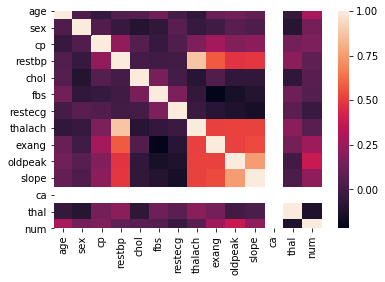

In [18]:
sns.heatmap(dfcor)

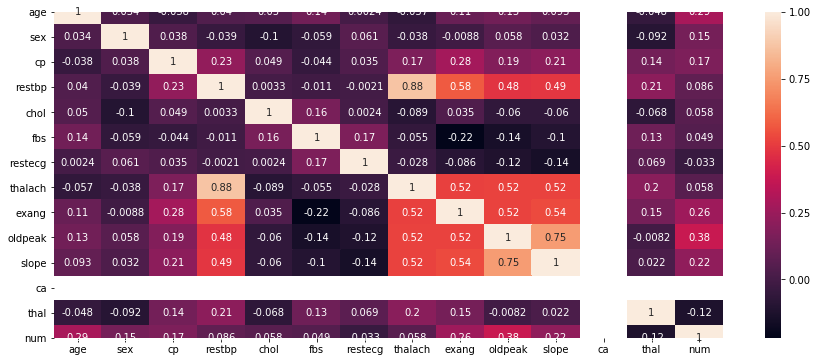

In [19]:
#visuvalizing the data and values are inserted in heatmap
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,color='RED',annot=True)

In [20]:
#Here 'ca' column has no correlation between other columns 
#so we are dropping this column.
df.drop("ca",axis=1,inplace=True)
df

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,1,4,140,260,0,1,112,1,3.0,2,0,2
1,44,1,4,130,209,0,1,127,0,0.0,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0.0,0,0,1
196,62,1,1,0,139,0,1,0,0,0.0,0,0,0
197,55,1,4,122,223,1,1,100,0,0.0,0,6,2
198,58,1,4,0,385,1,2,0,0,0.0,0,0,0


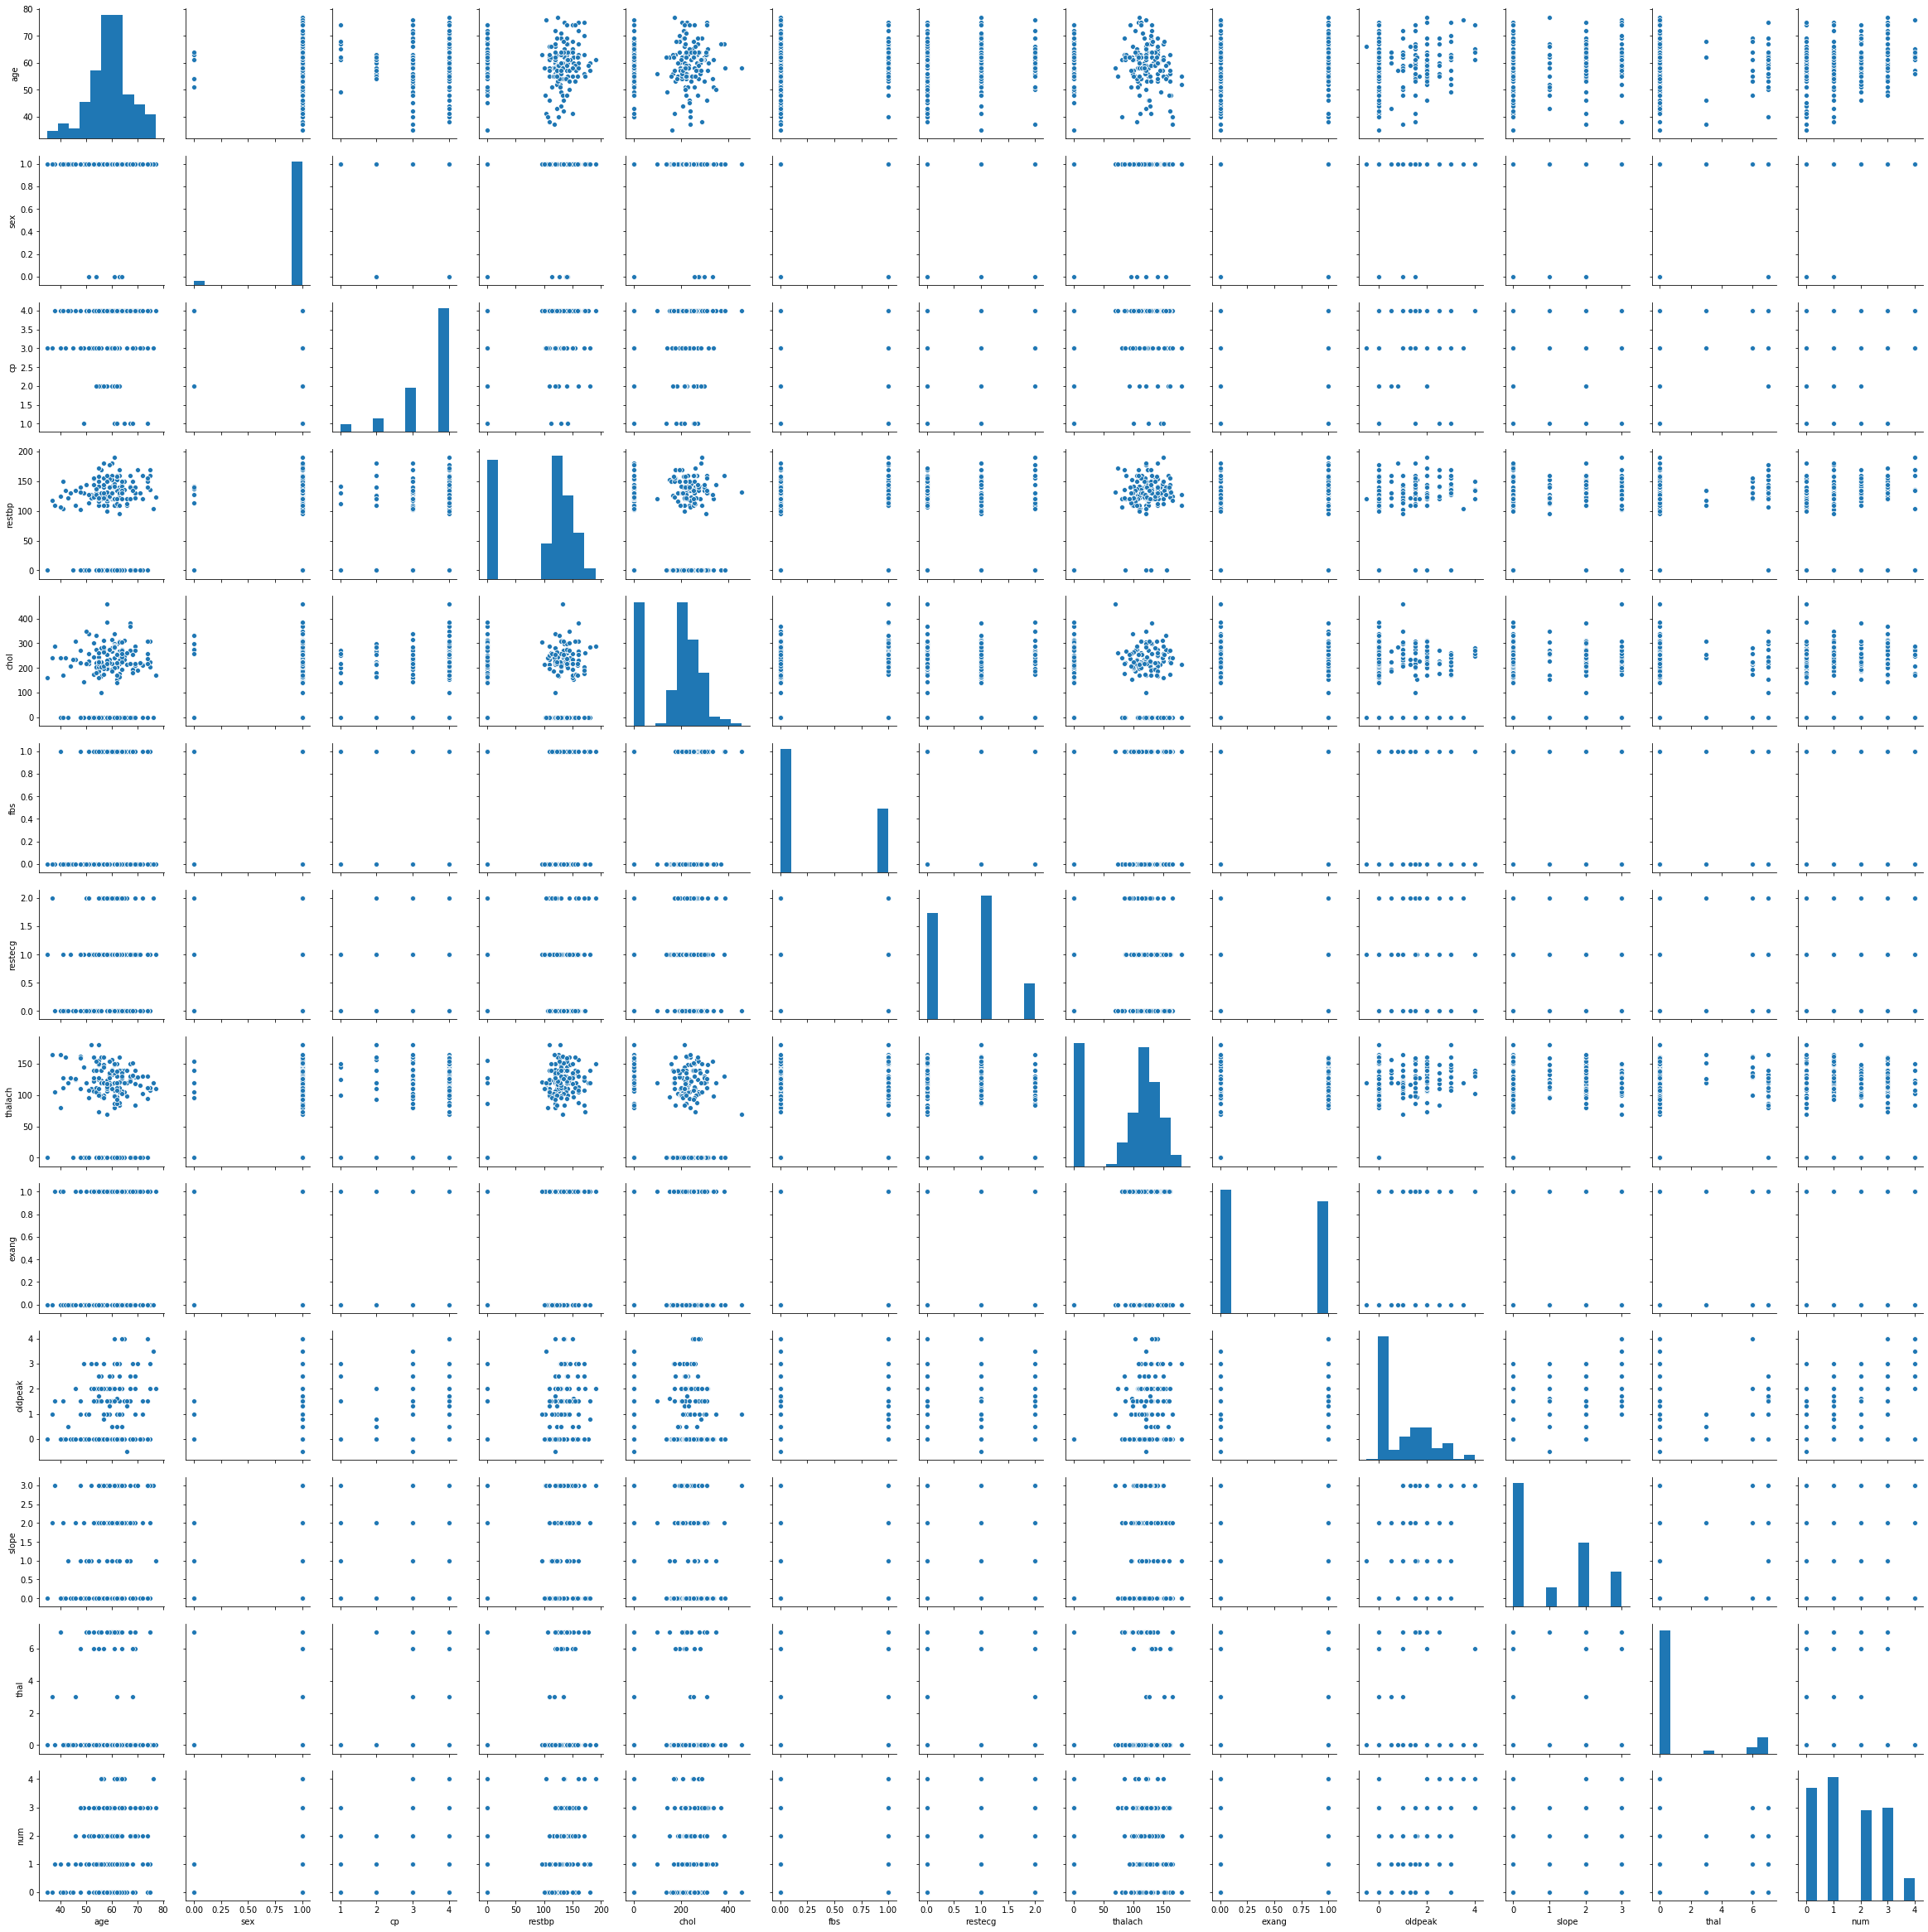

In [21]:
sns.pairplot(df)

In [22]:
#finding the skewness of the dataset

df.skew()

age       -0.404091
sex       -5.552105
cp        -1.648734
restbp    -0.750363
chol      -0.469975
fbs        0.680636
restecg    0.391463
thalach   -0.715818
exang      0.100883
oldpeak    0.823429
slope      0.468819
thal       1.905183
num        0.297393
dtype: float64

In [23]:
#removing the skewness of the dataset using the log

for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.55:
        df[i]=np.square(df[i])
        
df.skew()
       

age       -0.404091
sex       -5.552105
cp        -1.167506
restbp    -0.209748
chol      -0.469975
fbs        0.680636
restecg    0.391463
thalach   -0.001599
exang      0.100883
oldpeak    0.314899
slope      0.468819
thal       1.819829
num        0.297393
dtype: float64

In [24]:
#finding the outliers

from scipy.stats import zscore

z=abs(zscore(df))
print('df.shape:',df.shape)
df1=df.loc[(z<3).all(axis=1)]
print('df1.shape:',df1.shape)
print("z value is:",z)

df.shape: (200, 13)
df1.shape: (193, 13)
z value is: [[0.46842053 0.17586311 0.67195902 ... 0.82102898 0.44922593 0.3946109 ]
 [1.96993293 0.17586311 0.67195902 ... 0.89840344 0.44922593 1.24960118]
 [0.08341736 0.17586311 0.67195902 ... 1.68074519 0.44922593 0.3946109 ]
 ...
 [0.55825461 0.17586311 0.67195902 ... 0.89840344 2.16564409 0.3946109 ]
 [0.17325143 0.17586311 0.67195902 ... 0.89840344 0.44922593 1.24960118]
 [0.34008614 0.17586311 1.94181998 ... 0.89840344 0.44922593 0.42749514]]


In [25]:
df

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,1,16,19600,260,0.000000,1,12544,1,1.386294,2,0.00000,2
1,44,1,16,16900,209,0.000000,1,16129,0,0.000000,0,0.00000,0
2,60,1,16,17424,218,0.000000,1,19600,1,0.916291,3,0.00000,2
3,55,1,16,20164,228,0.000000,1,22201,1,1.252763,1,0.00000,1
4,66,1,9,12100,213,0.693147,2,9801,1,0.832909,2,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,16,16129,333,0.693147,1,23716,0,0.000000,0,0.00000,1
196,62,1,1,0,139,0.000000,1,0,0,0.000000,0,0.00000,0
197,55,1,16,14884,223,0.693147,1,10000,0,0.000000,0,1.94591,2
198,58,1,16,0,385,0.693147,2,0,0,0.000000,0,0.00000,0


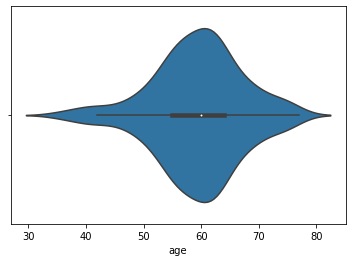

In [26]:
sns.violinplot(x="age",data=df)

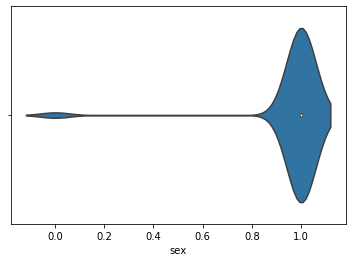

In [27]:
sns.violinplot(x="sex",data=df)

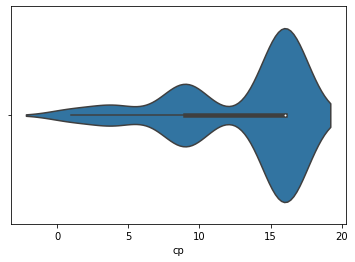

In [28]:
sns.violinplot(x="cp",data=df)

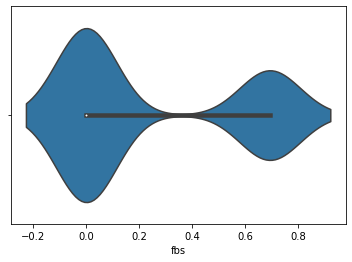

In [29]:
sns.violinplot(x="fbs",data=df)

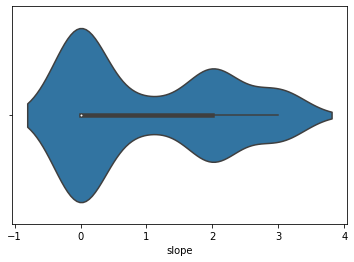

In [30]:
sns.violinplot(x="slope",data=df)

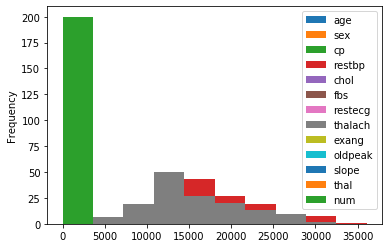

In [31]:
df.plot.hist()

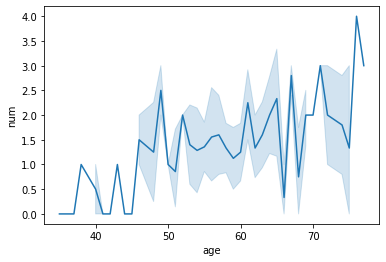

In [32]:
#line plot

sns.lineplot(df["age"],df["num"])
plt.show()

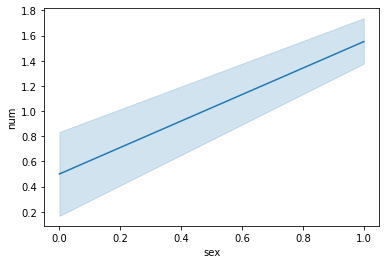

In [33]:
##Lets check the how sex is changing with respect to num
sns.lineplot(df["sex"],df["num"])
plt.show()

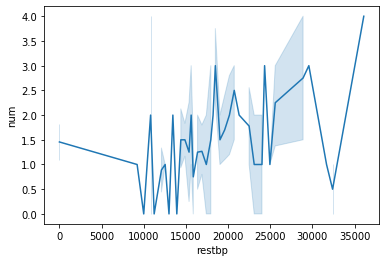

In [34]:
#Lets check the how restbp is changing with respect to num
sns.lineplot(df["restbp"],df["num"])
plt.show()

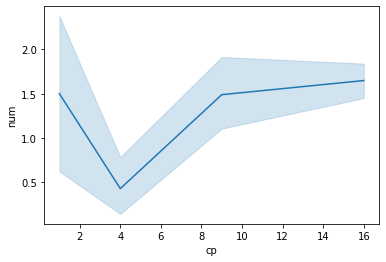

In [35]:
#Lets check the how cp is changing with respect to num
sns.lineplot(df["cp"],df["num"])
plt.show()

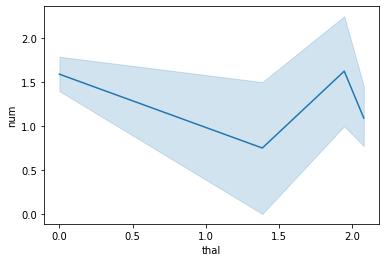

In [36]:
#Lets check the how sex is changing with respect to num
sns.lineplot(df["thal"],df["num"])
plt.show()

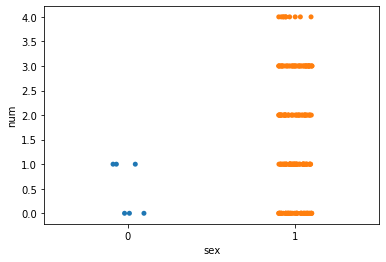

In [37]:
ax=sns.stripplot(x='sex',y="num",data=df);

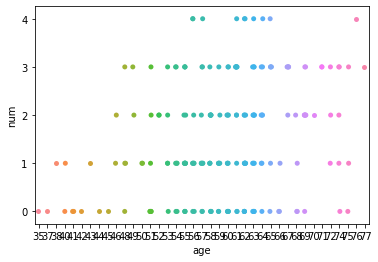

In [38]:
ax=sns.stripplot(x='age',y="num",data=df);

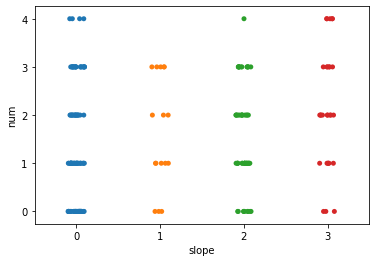

In [39]:
ax=sns.stripplot(x='slope',y="num",data=df);

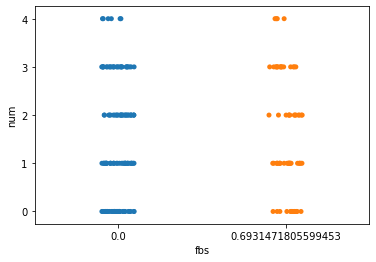

In [40]:
ax=sns.stripplot(x='fbs',y="num",data=df);

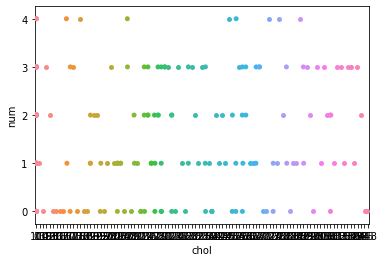

In [41]:
ax=sns.stripplot(x='chol',y="num",data=df);

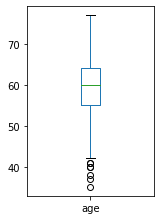

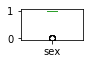

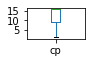

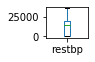

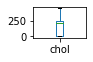

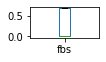

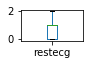

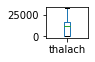

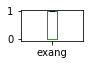

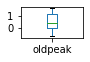

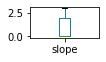

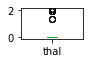

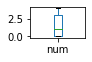

In [42]:
#box plot

import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

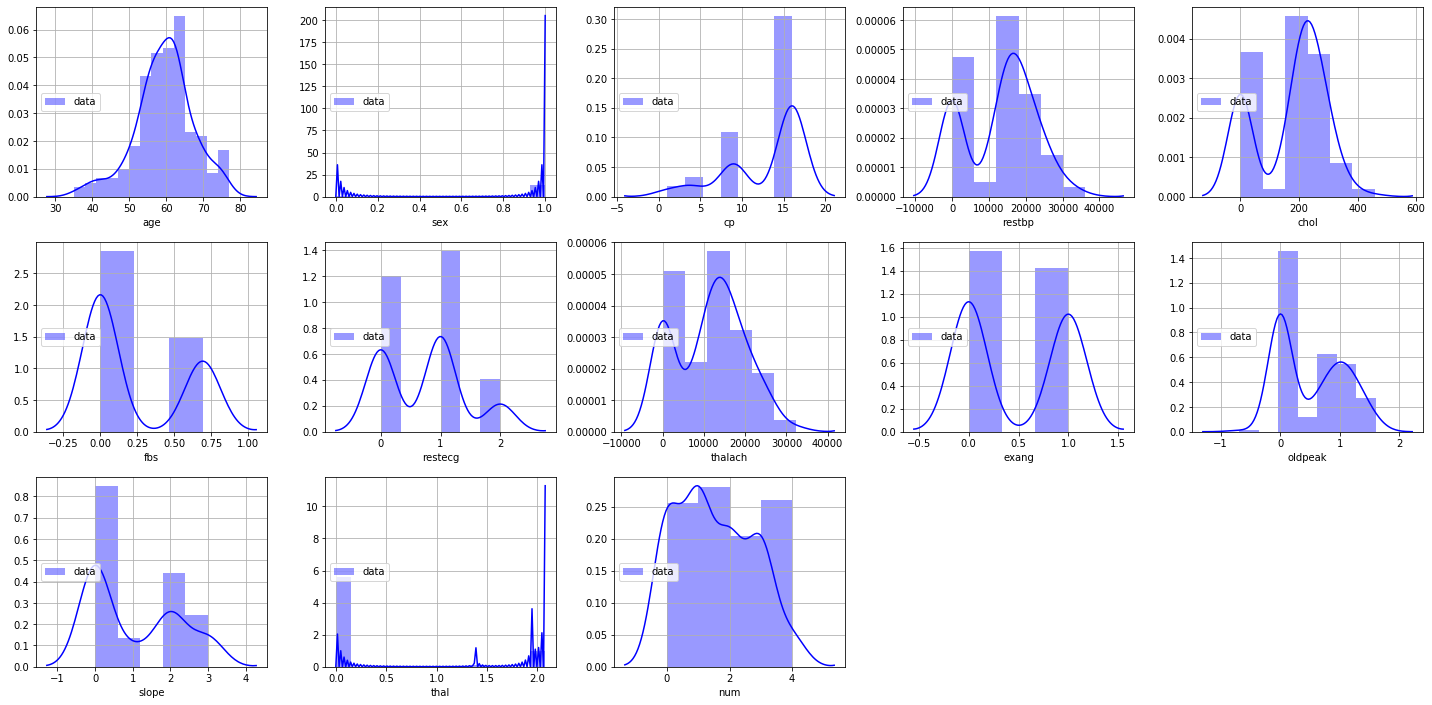

In [43]:
#Disti plot through iteration

plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df[col],color='b',kde=True,label='data')
    plt.grid()
    plt.legend(loc='center left')
    plt.tight_layout()

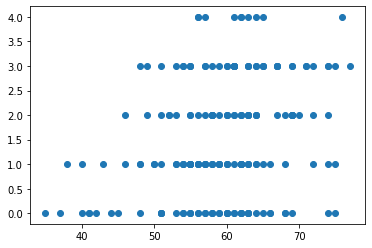

In [44]:
#scatterplot

plt.scatter(df['age'],df['num'])

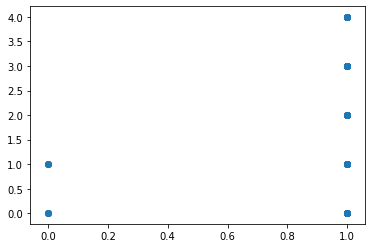

In [45]:
plt.scatter(df['sex'],df['num'])

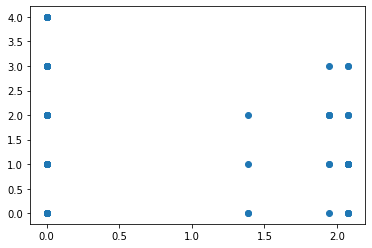

In [46]:
plt.scatter(df['thal'],df['num'])

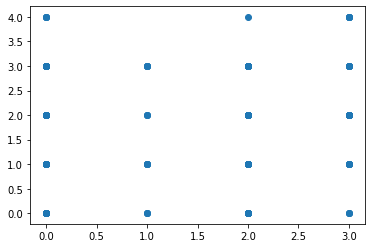

In [47]:
plt.scatter(df['slope'],df['num'])

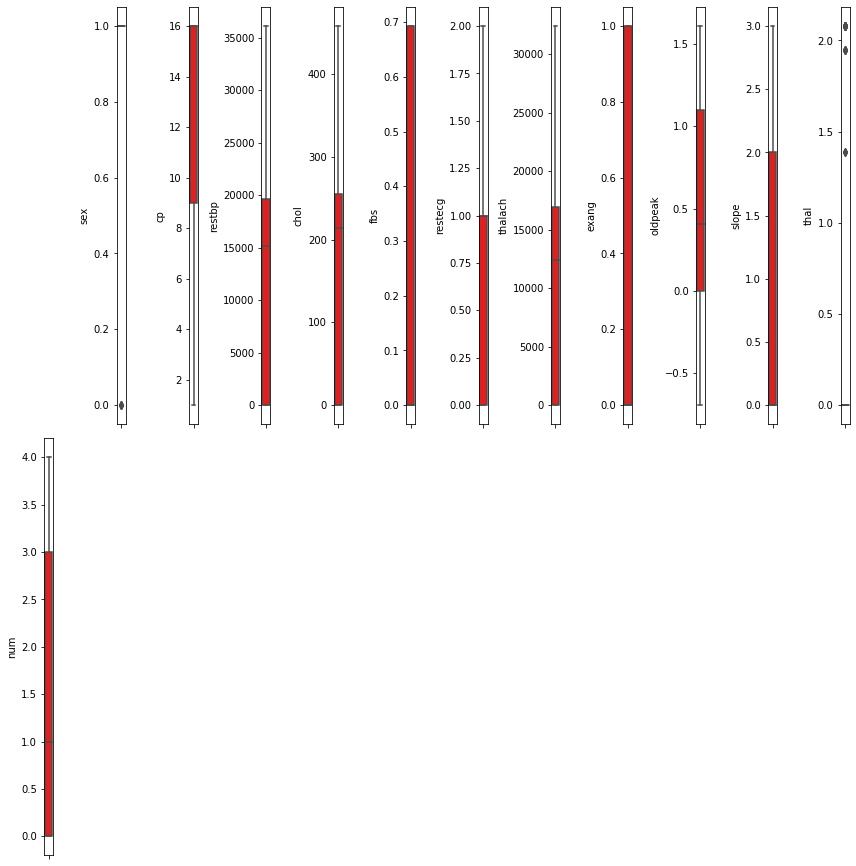

In [48]:
#column Plot
collist = df.columns.values
ncols=12
nrows=10
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='v')
    plt.tight_layout()

In [49]:
#we found sex and thal column has very less impact on num output.

df.drop("sex",axis=1,inplace=True)
df.drop("thal",axis=1,inplace=True)
df

,age,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,63,16,19600,260,0.000000,1,12544,1,1.386294,2,2
1,44,16,16900,209,0.000000,1,16129,0,0.000000,0,0
2,60,16,17424,218,0.000000,1,19600,1,0.916291,3,2
3,55,16,20164,228,0.000000,1,22201,1,1.252763,1,1
4,66,9,12100,213,0.693147,2,9801,1,0.832909,2,0
...,...,...,...,...,...,...,...,...,...,...,...
195,54,16,16129,333,0.693147,1,23716,0,0.000000,0,1
196,62,1,0,139,0.000000,1,0,0,0.000000,0,0
197,55,16,14884,223,0.693147,1,10000,0,0.000000,0,2
198,58,16,0,385,0.693147,2,0,0,0.000000,0,0


In [50]:
df['num'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [51]:
#finding/seperating the X value and Y value.


X = df.drop("num", axis=1)
X

,age,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,63,16,19600,260,0.000000,1,12544,1,1.386294,2
1,44,16,16900,209,0.000000,1,16129,0,0.000000,0
2,60,16,17424,218,0.000000,1,19600,1,0.916291,3
3,55,16,20164,228,0.000000,1,22201,1,1.252763,1
4,66,9,12100,213,0.693147,2,9801,1,0.832909,2
...,...,...,...,...,...,...,...,...,...,...
195,54,16,16129,333,0.693147,1,23716,0,0.000000,0
196,62,1,0,139,0.000000,1,0,0,0.000000,0
197,55,16,14884,223,0.693147,1,10000,0,0.000000,0
198,58,16,0,385,0.693147,2,0,0,0.000000,0


In [52]:
Y = df["num"]
Y

0      2
1      0
2      2
3      1
4      0
      ..
195    1
196    0
197    2
198    0
199    1
Name: num, Length: 200, dtype: int64

In [53]:
X.shape

(200, 10)

In [54]:
Y.shape

(200,)

In [55]:
Y = Y.values.reshape(-1,1)
Y

array([[2],
       [0],
       [2],
       [1],
       [0],
       [0],
       [3],
       [0],
       [3],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [4],
       [1],
       [0],
       [0],
       [2],
       [1],
       [3],
       [0],
       [2],
       [2],
       [2],
       [1],
       [1],
       [3],
       [3],
       [3],
       [3],
       [3],
       [2],
       [3],
       [2],
       [0],
       [1],
       [0],
       [3],
       [1],
       [3],
       [0],
       [4],
       [2],
       [1],
       [0],
       [2],
       [0],
       [1],
       [0],
       [2],
       [0],
       [1],
       [2],
       [2],
       [3],
       [0],
       [1],
       [0],
       [2],
       [1],
       [4],
       [2],
       [2],
       [3],
       [1],
       [1],
       [1],
       [0],
       [2],
       [0],
       [3],
       [3],
       [1],
       [2],
       [3],
       [2],
       [1],
       [0],
       [2],
       [2],
    

In [56]:
Y.shape

(200, 1)

In [57]:
#dividing the dataset into training and testing using train test split

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.22,random_state=39)

In [58]:
train_X.shape


(156, 10)

In [59]:
test_X.shape

(44, 10)

In [60]:
train_Y.shape

(156, 1)

In [61]:
test_Y.shape

(44, 1)

In [62]:
# applying the classification algorithms to predict the best model
#Using Naive Bayes Algortm
mb=MultinomialNB()
mb.fit(train_X,train_Y)


predmb = mb.predict(test_X)
print(accuracy_score(test_Y,predmb))
print(confusion_matrix(test_Y,predmb))
print(classification_report(test_Y,predmb))

0.18181818181818182
[[2 1 1 5 5]
 [2 2 2 2 2]
 [3 1 2 0 1]
 [1 0 3 0 4]
 [2 0 0 1 2]]
              precision    recall  f1-score   support

           0       0.20      0.14      0.17        14
           1       0.50      0.20      0.29        10
           2       0.25      0.29      0.27         7
           3       0.00      0.00      0.00         8
           4       0.14      0.40      0.21         5

    accuracy                           0.18        44
   macro avg       0.22      0.21      0.19        44
weighted avg       0.23      0.18      0.18        44



In [63]:
#Pediction using Support Vector Machine
svc = SVC(kernel='rbf')
svc.fit(train_X,train_Y)
svc.score(train_X,train_Y)
predsvc=svc.predict(test_X)
print(accuracy_score(test_Y,predsvc))
print(confusion_matrix(test_Y,predsvc))
print(classification_report(test_Y,predsvc))

0.22727272727272727
[[ 0 14  0  0  0]
 [ 0 10  0  0  0]
 [ 0  7  0  0  0]
 [ 0  8  0  0  0]
 [ 0  5  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.23      1.00      0.37        10
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         5

    accuracy                           0.23        44
   macro avg       0.05      0.20      0.07        44
weighted avg       0.05      0.23      0.08        44



In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#support Vector Machine by using Crossval Score
sv = SVC()

score=cross_val_score(sv,X,Y,cv=5,scoring='accuracy')
print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(sv,X,Y,cv=5)

print('Y Prediction values',y_pred)
print()

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

accuracy Score= [0.25581395 0.275      0.23076923 0.25641026 0.30769231]
Mean Scores 0.2651371496720334
Standard Deviation 0.02550471248029858
Y Prediction values [1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 0 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1]



0.265

In [65]:
#Use GridSearchCV for Support Vector Machine
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
gridsv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gridsv.fit(train_X, train_Y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.291, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.294, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.300, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.291, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.294, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.300, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.294, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.300, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.291, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.294, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.300, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.327, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.314, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [66]:

# print best parameter after tuning 
print(gridsv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridsv.best_estimator_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [67]:
# Re-run predictions and see classification report 

grid_predictions = gridsv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.24      1.00      0.38        10
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         5

    accuracy                           0.25        44
   macro avg       0.25      0.21      0.10        44
weighted avg       0.37      0.25      0.13        44



In [68]:
#Boost the Dataset by AdaBoost and GradiantBoost
from sklearn.ensemble import AdaBoostClassifier
modelad = AdaBoostClassifier()
modelad.fit(train_X,train_Y)
print(modelad.score(train_X,train_Y))
abpred=modelad.predict(test_X)
print(abpred)
modelad.score(test_X,test_Y)

0.4358974358974359
[3 2 3 3 2 3 3 2 3 1 2 2 3 2 1 0 2 2 2 2 3 0 2 2 0 2 2 2 1 3 1 3 1 1 1 1 1
 3 2 1 3 1 0 1]


0.25

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
modelgb=GradientBoostingClassifier()
modelgb.fit(train_X,train_Y)
print(modelgb.score(train_X,train_Y))
abpred=modelgb.predict(test_X)
print(abpred)
modelgb.score(test_X,test_Y)

1.0
[1 1 2 2 3 3 1 3 3 1 2 0 2 2 1 0 3 2 0 1 3 1 2 1 0 3 1 1 1 1 1 2 0 1 1 0 1
 1 1 1 1 3 1 1]


0.3181818181818182

In [70]:
#Boosting though GradientBoost Regressor By using Parameters
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [71]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)

print('R2 sq: ',model_score)
y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.8578399278199592
R2 sq:  0.8578399278199592
Mean squared error: 1.67
Test Variance score: 0.13


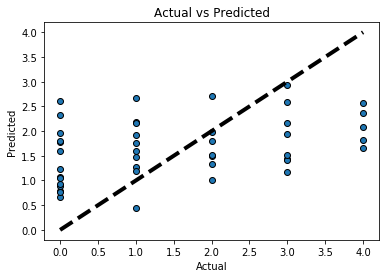

In [72]:
#Visualize the Prediction
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [74]:
#Using DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(train_X,train_Y)
dtc.score(train_X,train_Y)
preddtc=dtc.predict(test_X)
print(accuracy_score(test_Y,preddtc))
print(confusion_matrix(test_Y,preddtc))
print(classification_report(test_Y,preddtc))

0.38636363636363635
[[5 3 2 4 0]
 [2 7 0 1 0]
 [0 5 0 2 0]
 [1 4 0 3 0]
 [0 1 1 1 2]]
              precision    recall  f1-score   support

           0       0.62      0.36      0.45        14
           1       0.35      0.70      0.47        10
           2       0.00      0.00      0.00         7
           3       0.27      0.38      0.32         8
           4       1.00      0.40      0.57         5

    accuracy                           0.39        44
   macro avg       0.45      0.37      0.36        44
weighted avg       0.44      0.39      0.37        44



In [75]:
#DTC by using Crossval Score
dt=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dt,X,Y,cv=5,scoring='f1_macro')

print('F1-score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(dt,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

F1-score: [0.25409695 0.29904762 0.22960717 0.1892185  0.35587719]
Mean Scores 0.2655694859246503
Standard Deviation 0.05749895233341923
Y Prediction values
[2 0 3 3 2 0 3 2 2 1 0 1 1 1 1 0 2 1 2 1 1 3 1 1 1 2 1 1 2 0 0 2 3 1 1 1 0
 2 1 4 2 0 0 3 1 3 1 3 3 0 1 0 0 3 3 2 0 4 1 0 0 2 3 1 2 1 1 1 2 0 2 3 0 4
 3 3 2 3 4 2 3 4 0 1 3 1 2 0 3 0 3 2 2 0 1 3 0 1 2 4 0 3 2 2 1 4 3 1 0 3 3
 1 0 2 0 3 1 1 4 3 4 4 2 1 0 0 1 4 1 2 1 1 3 4 3 3 0 1 1 2 3 1 3 1 3 3 2 0
 0 3 2 3 1 3 2 1 3 0 1 1 1 3 1 3 2 2 0 2 3 1 1 0 2 0 0 0 3 2 0 1 0 0 1 0 1
 3 3 2 3 1 0 3 1 1 0 4 0 0 4 1]


array([[17, 11, 10,  9,  4],
       [12, 23,  9, 11,  1],
       [ 8, 11, 10,  8,  4],
       [ 7,  8,  7, 15,  5],
       [ 1,  5,  1,  3,  0]], dtype=int64)

In [76]:
#GridSearchCV for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
dt_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dt_grid_search_cv.fit(train_X, train_Y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    7.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16

In [77]:
# the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(dt_grid_search_cv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(dt_grid_search_cv.best_estimator_)

{'max_leaf_nodes': 30, 'min_samples_split': 4}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [78]:
# Re-run predictions and see classification report 

grid_predictions = dt_grid_search_cv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       0.50      0.29      0.36        14
           1       0.30      0.70      0.42        10
           2       0.00      0.00      0.00         7
           3       0.22      0.25      0.24         8
           4       1.00      0.20      0.33         5

    accuracy                           0.32        44
   macro avg       0.41      0.29      0.27        44
weighted avg       0.38      0.32      0.29        44



In [79]:
#Boost Decision Tree Classifier
from sklearn.ensemble import AdaBoostClassifier

dtbclassifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
dtbclassifier.fit(train_X, train_Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [80]:
predictions = dtbclassifier.predict(test_X)
predictions

array([0, 0, 2, 3, 3, 3, 3, 3, 2, 2, 2, 0, 3, 2, 2, 0, 3, 1, 1, 0, 2, 0,
       2, 0, 3, 1, 1, 1, 2, 3, 1, 3, 1, 2, 1, 0, 3, 3, 2, 1, 3, 2, 3, 1],
      dtype=int64)

In [82]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))
confusion_matrix(test_Y, predictions)

0.22727272727272727


array([[3, 5, 3, 3, 0],
       [2, 2, 2, 4, 0],
       [1, 1, 3, 2, 0],
       [2, 1, 3, 2, 0],
       [0, 1, 1, 3, 0]], dtype=int64)

In [83]:
#Prediction Using KNN Nearest Neighbor
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)
knn.score(train_X,train_Y)
predknn=knn.predict(test_X)
print(accuracy_score(test_Y,predknn))
print(confusion_matrix(test_Y,predknn))
print(classification_report(test_Y,predknn))

0.25
[[3 8 3 0 0]
 [3 5 2 0 0]
 [2 4 1 0 0]
 [1 2 3 2 0]
 [0 5 0 0 0]]
              precision    recall  f1-score   support

           0       0.33      0.21      0.26        14
           1       0.21      0.50      0.29        10
           2       0.11      0.14      0.12         7
           3       1.00      0.25      0.40         8
           4       0.00      0.00      0.00         5

    accuracy                           0.25        44
   macro avg       0.33      0.22      0.22        44
weighted avg       0.35      0.25      0.24        44



In [84]:
#KNN Nearest Neighbor by using Crossval Score
kn=KNeighborsClassifier()

score=cross_val_score(kn,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(kn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.26086957 0.19047619 0.45       0.35       0.25       0.35
 0.10526316 0.21052632 0.26315789 0.31578947]
Mean Scores 0.2746082597798845
Standard Deviation 0.09198580167808863
Y Prediction values
[2 2 2 0 0 1 2 1 1 0 2 3 1 0 1 3 3 1 1 2 1 1 1 0 0 2 1 2 1 0 1 1 1 1 1 3 1
 1 0 2 0 0 1 1 0 0 1 3 4 0 1 0 3 1 2 2 1 3 0 0 1 1 1 2 3 1 3 2 1 3 0 2 0 2
 1 3 1 3 1 2 0 1 3 2 2 1 1 2 0 0 1 0 1 0 1 4 0 1 1 1 0 2 0 0 2 0 3 0 0 2 3
 1 0 1 0 3 1 0 0 1 0 3 3 0 1 0 2 1 1 0 0 2 3 0 3 3 1 1 1 3 3 1 0 0 0 0 0 0
 0 3 3 3 0 3 1 0 1 1 1 0 3 3 0 0 1 0 0 0 0 1 1 0 3 2 0 1 1 0 0 2 1 1 0 1 0
 0 1 3 0 1 0 1 3 2 2 0 0 1 3 0]
y_pred.shape (200,)


array([[23, 15,  7,  6,  0],
       [22, 19,  8,  7,  0],
       [10, 18,  7,  5,  1],
       [10, 14,  4, 13,  1],
       [ 3,  3,  2,  2,  0]], dtype=int64)

In [86]:
#Use GridSearchCV for KNN Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []


for k in k_range:
    
    knn1 = KNeighborsClassifier(n_neighbors=k)
   
    scores = cross_val_score(knn1, train_X, train_Y, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.2886294261294261, 0.30124236874236876, 0.3273412698412698, 0.33537698412698413, 0.30417887667887666, 0.3214224664224664, 0.35351190476190475, 0.38453754578754584, 0.3786507936507937, 0.35495421245421244, 0.33379578754578754, 0.34850579975579976, 0.35009310134310134, 0.3552319902319902, 0.3304563492063492, 0.33670634920634923, 0.3207722832722833, 0.32023809523809527, 0.27835775335775337, 0.3536782661782662, 0.3459859584859585, 0.32162698412698415, 0.350515873015873, 0.3428235653235653, 0.3106868131868132, 0.3106868131868132, 0.3162423687423687, 0.3316269841269841, 0.31735347985347984, 0.298550061050061]


In [87]:

knn1 = KNeighborsClassifier(n_neighbors=k)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [89]:
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [92]:
gridknn = GridSearchCV(knn1, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
gridknn.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [93]:

# print best parameter after tuning 
print(gridknn.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridknn.best_estimator_)

{'n_neighbors': 8}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')


In [94]:
grid_predictions = gridknn.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       0.57      0.29      0.38        14
           1       0.25      0.50      0.33        10
           2       0.09      0.14      0.11         7
           3       0.50      0.38      0.43         8
           4       0.00      0.00      0.00         5

    accuracy                           0.30        44
   macro avg       0.28      0.26      0.25        44
weighted avg       0.34      0.30      0.29        44



In [96]:
#Bagging of KNN Nearest Neighbor
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
baggingknn.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [97]:
predictions = baggingknn.predict(test_X)
predictions

array([1, 1, 1, 1, 2, 2, 2, 1, 2, 3, 2, 1, 2, 2, 1, 3, 2, 1, 2, 1, 3, 2,
       1, 2, 0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1],
      dtype=int64)

In [98]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))
confusion_matrix(test_Y, predictions)

0.25


array([[2, 6, 4, 2, 0],
       [1, 7, 2, 0, 0],
       [0, 5, 2, 0, 0],
       [0, 1, 7, 0, 0],
       [0, 3, 1, 1, 0]], dtype=int64)

In [99]:
#Using RandomForest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)
rf.score(train_X,train_Y)
predf=rf.predict(test_X)
print(accuracy_score(test_Y,predf))
print(confusion_matrix(test_Y,predf))
print(classification_report(test_Y,predf))

0.29545454545454547
[[5 4 0 5 0]
 [1 5 2 2 0]
 [1 3 1 2 0]
 [1 3 2 2 0]
 [0 3 1 1 0]]
              precision    recall  f1-score   support

           0       0.62      0.36      0.45        14
           1       0.28      0.50      0.36        10
           2       0.17      0.14      0.15         7
           3       0.17      0.25      0.20         8
           4       0.00      0.00      0.00         5

    accuracy                           0.30        44
   macro avg       0.25      0.25      0.23        44
weighted avg       0.32      0.30      0.29        44



In [100]:
#RandomForestClassifier Using Cross_Val_Score

rf1=RandomForestClassifier()

score=cross_val_score(rf1,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(rf1,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.13043478 0.23809524 0.35       0.4        0.25       0.45
 0.36842105 0.10526316 0.52631579 0.26315789]
Mean Scores 0.30816879154407756
Standard Deviation 0.12829548953264167
Y Prediction values
[3 0 2 1 2 0 2 1 2 0 0 1 2 1 1 0 0 1 2 2 1 2 0 3 0 2 1 1 1 0 0 2 3 1 1 2 1
 2 1 2 0 0 1 0 1 1 1 1 0 0 2 0 0 1 1 3 0 3 0 0 0 1 2 2 0 3 3 0 1 0 1 3 0 2
 3 1 0 0 2 1 3 4 2 1 2 1 0 1 3 1 2 0 1 0 1 2 0 1 0 2 0 3 0 1 2 2 1 1 1 0 3
 1 0 3 0 3 1 1 3 3 4 3 1 1 0 0 1 4 2 1 1 1 0 1 3 1 0 1 1 2 2 1 0 2 0 0 2 2
 0 3 0 3 0 2 1 1 3 3 1 1 1 1 1 3 2 1 3 0 3 0 1 0 2 3 0 1 3 3 1 1 0 3 1 1 1
 0 3 0 0 3 0 3 1 0 0 0 0 2 0 1]
y_pred.shape (200,)


array([[22, 15, 10,  4,  0],
       [18, 27,  7,  4,  0],
       [10, 13,  6,  9,  3],
       [ 9, 10,  9, 14,  0],
       [ 2,  3,  3,  2,  0]], dtype=int64)

In [101]:
#GridSearchCV for Random Forest Classifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf2 = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf2 = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf2.fit(train_X,train_Y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  5.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [102]:
# print best parameter after tuning 
print(grid_search_rf2.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_rf2.best_estimator_)

{'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [103]:
predictions = (grid_search_rf2.predict(test_X))
  
# print classification report 
print(classification_report(test_Y, predictions)) 

              precision    recall  f1-score   support

           0       0.60      0.21      0.32        14
           1       0.22      0.50      0.30        10
           2       0.14      0.14      0.14         7
           3       0.22      0.25      0.24         8
           4       0.00      0.00      0.00         5

    accuracy                           0.25        44
   macro avg       0.24      0.22      0.20        44
weighted avg       0.30      0.25      0.23        44



In [105]:
#Bagging of Random Forest Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
baggingrf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
baggingrf.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [106]:
predictionsrf = baggingrf.predict(test_X)
predictionsrf

array([2, 1, 3, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1],
      dtype=int64)

In [108]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictionsrf))
confusion_matrix(test_Y, predictionsrf)

0.36363636363636365


array([[5, 6, 3, 0, 0],
       [1, 7, 2, 0, 0],
       [0, 2, 4, 1, 0],
       [2, 1, 5, 0, 0],
       [0, 4, 1, 0, 0]], dtype=int64)

In [ ]:
#Among all models modelgbr gives the Highest accuracy(85%) and remaining all gives low score
#so we are going to save this model GradientBoost Regressor as the best model.

In [111]:
# saving the predection to a csv file.
prediction = pd.DataFrame(y_predictedgbr, columns=['prediction']).to_csv('Project 10_HeartDisease.csv')

In [112]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(modelgbr,'p10heartdisease.pkl')

['p10heartdisease.pkl']